<a href="https://colab.research.google.com/github/SelgiAgilsa/Tugas2-Clustering-Snsscrapetweet/blob/main/Tugas_snsscrapetweet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Klastering data twitter menggunakan keyword "narkoba" 
Start= 2022–09–15
End = 2022–10–15

**Install library snscrape**. Snscrape is a Python library that can be used to scrape tweets through Twitter's API without any restrictions or request limits.

In [1]:
!pip3 install snscrape

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


**Install library langdetect.**

In [2]:
pip install langdetect

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 981 kB 33.0 MB/s 
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993242 sha256=f36c1d89009d2111278a3386be59e2bc865b5b9d65b5f141c9458ba9b4a6d478
  Stored in directory: /root/.cache/pip/wheels/c5/96/8a/f90c59ed25d75e50a8c10a1b1c2d4c402e4dacfa87f3aff36a
Successfully built langdetect


**Import snscrape.modules.twitter and json.** The packages you will need.

In [3]:
import snscrape.modules.twitter as sntwitter
import json
from langdetect import detect

**Specify your query parameters.**

In [21]:
keywords=['narkoba']
start="2022–09–15"
end ="2022–10–15"
max_num=180
fname='tweet.json' 
languages=['id']

**Import library Panda.**

In [22]:
import pandas as pd
datatwitter=[]

**Then starting crawling.**

In [23]:
for keyword in keywords:
   
    for i, tweet in enumerate (sntwitter.TwitterSearchScraper(f'{keyword} ').get_items()):
        
        try:
            lan=detect(tweet.content)
        except:
            lan='error'
        if i == max_num:
            break
        if lan in languages:
            data = {'id': tweet.id, 'username':tweet.username, 'date': tweet.date, 'text': tweet.content,'url':tweet.url}
           # print(data)
            datatwitter.append(tweet.content)
            with open(fname, 'a+', encoding='utf-8') as f:
                line = json.dumps(data, ensure_ascii=False,default=str)
                #print(line)
                f.write(line)
                f.write('\n')

In [24]:
datatwitter

['@dailexsy @coppamagz Iyaa nih aku jadi tau yang semenjak ada kasus artis indo pake narkoba buat stamina krn jadwal padetnya, ooh ternyata mereka pake bisa untuk itu. Yaa gak dibenarkan tp ternyata di dunia artis itu bisa terjadi yaa',
 'Satres Narkoba Polres Langkat Laksanakan Tes Urine Terhadap\xa0Personel https://t.co/5m7xlpY48q',
 '@DrEvaChaniago Betapa baiknya hati mereka dalam menjalankan tugas negara wakanda menggunakan dana pribadi. Dimana yang ini menggunakan 300jt utk bertolak ke rumah korban, yang satunya 20M utk operasi narkoba diselat malaka &amp; laut china. Gilaa yee...',
 '@DivHumas_Polri Seandainya semua polisi seperti, tidak akan pernah ada narkoba dan judi di negeri ini',
 'Semangat Tumpas Narkoba bersama SMPN 3 Banyuwangi 👌👌💪💪\nhttps://t.co/09i72wgIgF',
 'Irjen Pol Teddy Minahasa ditetapkan tersangka kasus penyalahgunaan narkoba.\n\nKendati demikian, Teddy Minahasa bantah tuduhan sebagai pengguna dan pengedar narkoba.\n\nhttps://t.co/lc1lfpiUES',
 'Teddy Minahasa j

**Install Sastrawi.** Library Sastrawi merupakan library sederhana yang dapat mengubah kata berimbuhan bahasa Indonesia menjadi bentuk dasarnya.

In [25]:
!pip install Sastrawi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


**Melakukan proses stemming, melakukan proses penghilangan stopword,
melakukan penghilangan karakter yang tidak bermakna.**

In [26]:
import re
import string
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory# create stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()# stemming process
# import StopWordRemoverFactory class
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
factory = StopWordRemoverFactory()
stopword = factory.create_stop_word_remover()
documents_clean=[]

for d in datatwitter:
    outputstem= stemmer.stem(d)
    d= stopword.remove(outputstem)
    # Remove Unicode
    document_test = re.sub(r'[^\x00-\x7F]+', ' ', d)
    # Remove Mentions
    document_test = re.sub(r'@\w+', '', document_test)
    # Lowercase the document
    document_test = document_test.lower()
    # Remove punctuations
    document_test = re.sub(r'[%s]' % re.escape(string.punctuation), ' ', document_test)
    # Lowercase the numbers
    document_test = re.sub(r'[0-9]', '', document_test)
    # Remove the doubled space
    outputstop = re.sub(r'\s{2,}', ' ', document_test)
    documents_clean.append(outputstop)

In [27]:
documents_clean[0:5]

['dailexsy coppamagz iyaa nih aku jadi tau semenjak kasus artis indo pake narkoba buat stamina krn jadwal padetnya ooh nyata pake untuk yaa gak benar tp nyata dunia artis bisa jadi yaa',
 'satres narkoba polres langkat laksana tes urine hadap personel https t co mxlpyq',
 'drevachaniago betapa baik hati dalam jalan tugas negara wakanda dana pribadi mana ini jt utk tolak rumah korban satu m utk operasi narkoba selat malaka amp laut china gilaa yee',
 'divhumas polri semua polisi tidak pernah narkoba judi negeri',
 'semangat tumpas narkoba sama smpn banyuwangi https t co iwgigf']

In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
tfidfvectorizer = TfidfVectorizer(analyzer='word')
tfidf_wm = tfidfvectorizer.fit_transform(documents_clean)
tfidf_tokens = tfidfvectorizer.get_feature_names()


Text(0.5, 1.0, 'Most Frequently Occuring Words - Top 20')

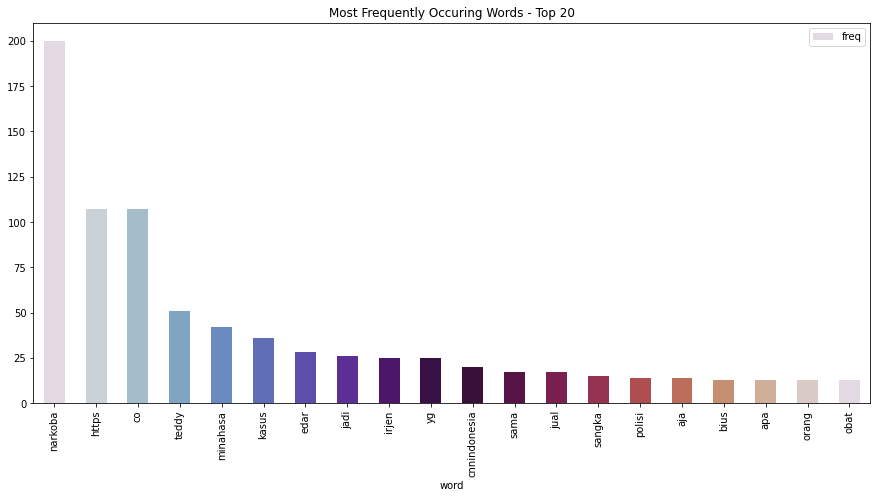

In [30]:
from sklearn.feature_extraction.text import CountVectorizer 
import matplotlib.pyplot as plt
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
cv = CountVectorizer()
words = cv.fit_transform(documents_clean)
sum_words = words.sum(axis=0)


words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)
frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

color = plt.cm.twilight(np.linspace(0, 1, 20))
frequency.head(20).plot(x='word', y='freq', kind='bar', figsize=(15, 7), color = color)
plt.title("Most Frequently Occuring Words - Top 20")

In [31]:
from sklearn.cluster import KMeans
true_k = 3
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
model.fit(words)

KMeans(max_iter=100, n_clusters=3, n_init=1)

**Menampilkan hasil cluster.**

In [32]:
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = cv.get_feature_names()

for i in range(true_k):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind]),
    print

print("\n")

Cluster 0:
 co
 https
 narkoba
 khan
 polres
 bbm
 sabu
 amal
 baba
 shah
Cluster 1:
 narkoba
 https
 co
 yg
 jadi
 cnnindonesia
 edar
 sama
 polisi
 aja
Cluster 2:
 narkoba
 teddy
 https
 co
 minahasa
 irjen
 kasus
 edar
 sumpah
 henry




/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


**Memasukkan prediksi kata tertentu.**

In [33]:
print("Prediction")
Y = cv.transform(["sabu"])
prediction = model.predict(Y)
print("Cluster number :", prediction)
Y = cv.transform(["polri"])
prediction = model.predict(Y)
print("Cluster number :", prediction)

Prediction
Cluster number : [1]
Cluster number : [1]


**Menampilkan grafik Dendogram.** Dendrogram adalah sebuah grafik (diagram) yang menunjukkan proses penggabungan kluster. 

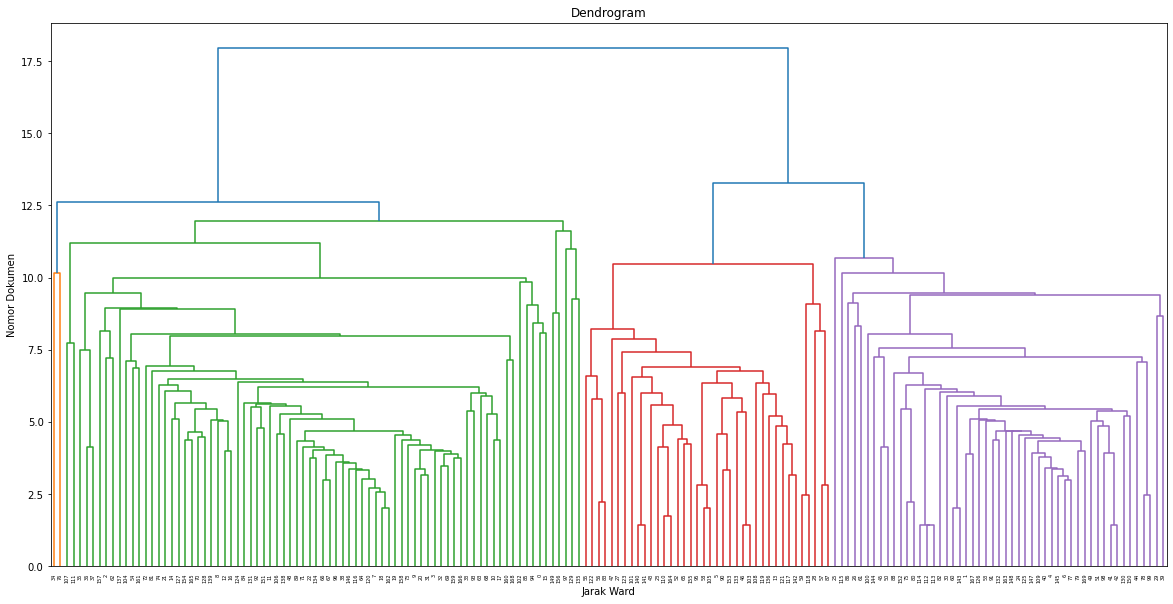

In [41]:
import scipy.cluster.hierarchy as sch
X = cv.fit_transform(documents_clean).todense()
plt.figure(figsize=(20, 10))
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward',metric='euclidean'),orientation="top")
plt.title('Dendrogram')
plt.xlabel('Jarak Ward')
plt.ylabel('Nomor Dokumen')
plt.show()

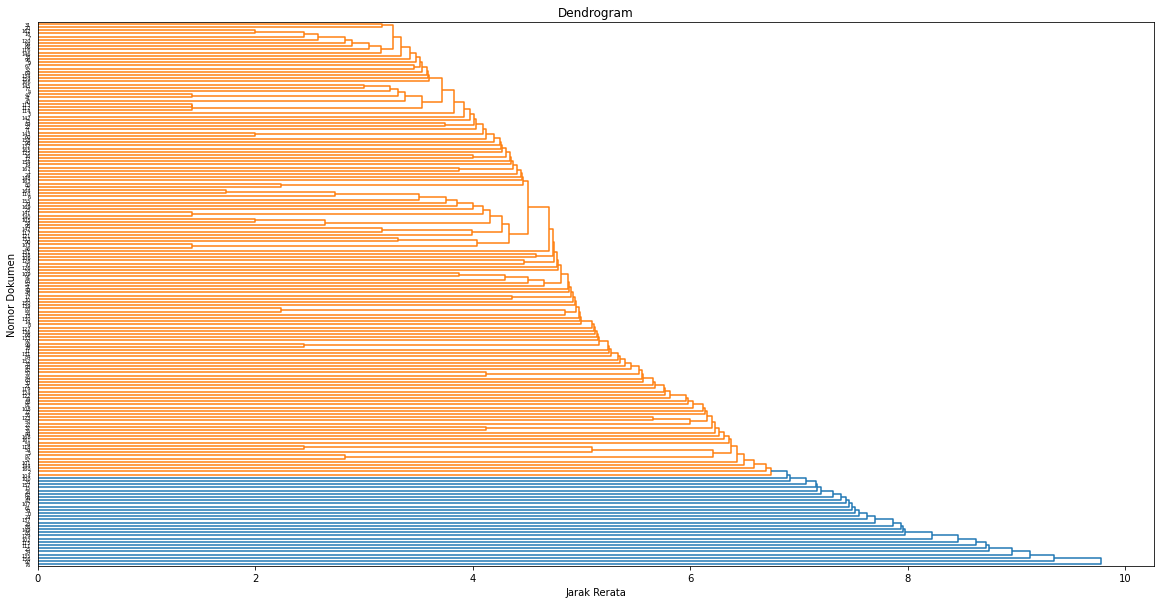

In [44]:
import scipy.cluster.hierarchy as sch
X = cv.fit_transform(documents_clean).todense()
plt.figure(figsize=(20, 10))
dendrogram = sch.dendrogram(sch.linkage(X, method = 'average',metric='euclidean'),orientation="right")
plt.title('Dendrogram')
plt.xlabel('Jarak Rerata')
plt.ylabel('Nomor Dokumen')
plt.show()

**Hasil dengan algoritma Agglomerative Clustering**

In [45]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=6, affinity='euclidean', linkage='ward')  
cluster.fit_predict(X) 
print(cluster.labels_)

[0 4 0 0 4 2 4 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 2 4 4 4 2 2 4 4 0 0 0 3 0 0
 0 0 4 4 4 4 2 4 4 2 2 0 4 4 4 2 4 0 2 2 2 2 2 4 4 0 0 0 2 0 0 0 0 0 0 0 0
 0 4 3 4 4 4 4 0 4 2 0 0 4 2 4 0 2 4 0 0 0 2 0 1 4 4 4 2 0 2 0 2 0 0 2 4 2
 0 4 4 4 4 0 2 2 2 0 2 2 2 0 4 4 0 0 1 4 0 4 2 0 1 2 0 0 0 2 2 2 4 4 4 0 4
 4 5 4 0 4 2 0 2 5 0 0 0 0 0 0 4 2 0 0 4 0 4]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


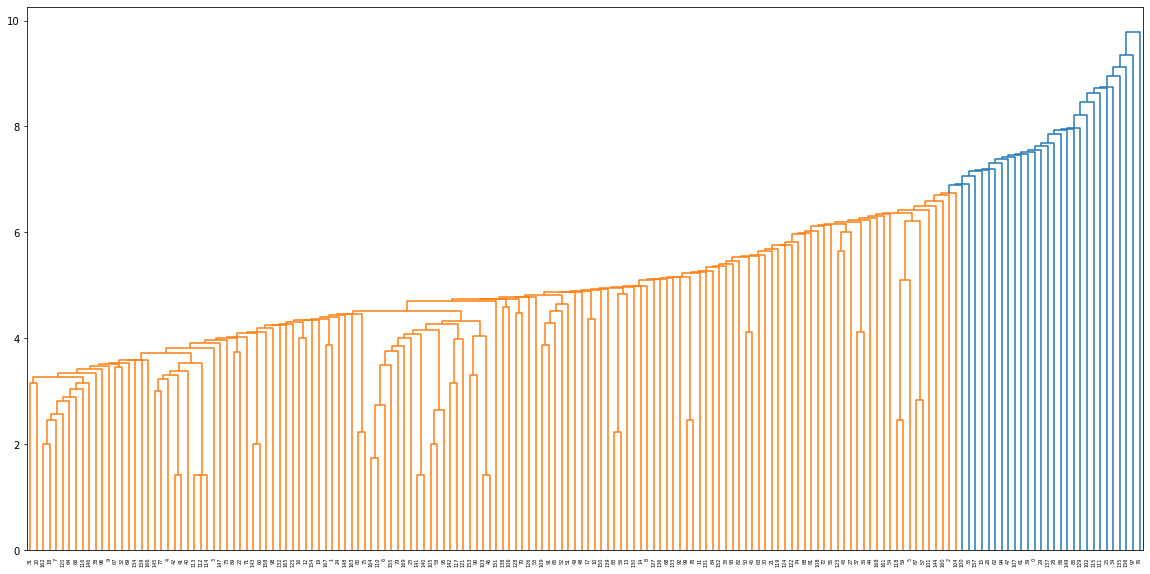

In [46]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt

linked = linkage(X, 'average')

labelList = range(0, len(cluster.labels_))

plt.figure(figsize=(20, 10))
dendrogram(linked,
            orientation='top',
            labels=labelList,
            distance_sort='descending',
            show_leaf_counts=True)
plt.show()

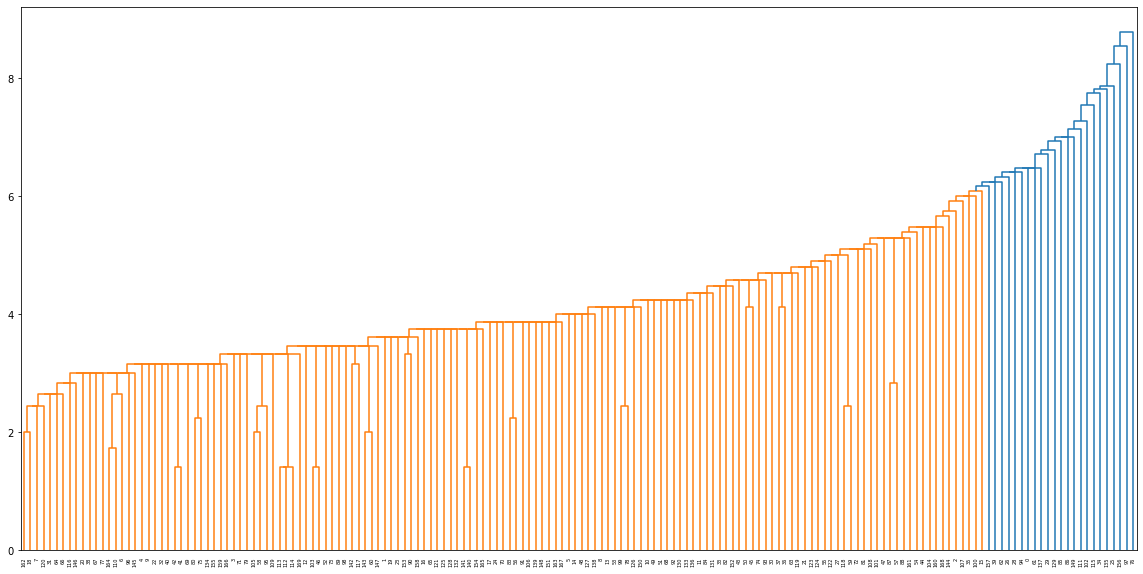

In [48]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt

linked = linkage(X, 'single')

labelList = range(0, len(cluster.labels_))

plt.figure(figsize=(20, 10))
dendrogram(linked,
            orientation='top',
            labels=labelList,
            distance_sort='descending',
            show_leaf_counts=True)
plt.show()